In [30]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import polars as pl
import seaborn as sns

from cricket.constants import DATA_FOLDER

# Batter Stats

Just a quick notebook to check if the batter stats gets me the level of data I need. Just by doing some rough work on an intermediatery file that I've done with Joe Root's data.

In [3]:
example_data = pl.read_csv(DATA_FOLDER.joinpath("joe_root_tests.csv"))
example_data = example_data.with_row_index()
example_data.head()

index,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,start_date,venue
u32,i64,i64,i64,i64,bool,str,i64,i64,str,str
0,565809,1,73,229,true,"""caught and bow…",4,0,"""2012-12-13T00:…","""Vidarbha Crick…"
1,565809,3,20,56,false,null,1,1,"""2012-12-13T00:…","""Vidarbha Crick…"
2,569243,1,4,11,true,"""caught""",1,0,"""2013-03-06T00:…","""University Ova…"
3,569243,3,0,2,false,null,0,0,"""2013-03-06T00:…","""University Ova…"
4,569244,1,10,20,true,"""caught""",1,0,"""2013-03-14T00:…","""Basin Reserve"""


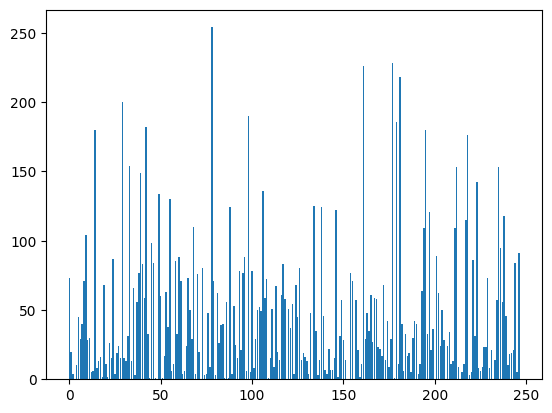

In [4]:
# scores
fig, ax = plt.subplots()

ax.bar(example_data["index"], example_data["total_runs"])

plt.show()

In [5]:
total_runs = example_data["total_runs"].sum()
valid_out = [
    "bowled",
    "caught",
    "lbw",
    "stumped",
    "run out",
    "hit wicket",
    "caught and bowled",
]
innings_out = len(example_data.filter(pl.col("how_out").is_in(valid_out)))

In [6]:
average = total_runs / innings_out
average

51.42342342342342

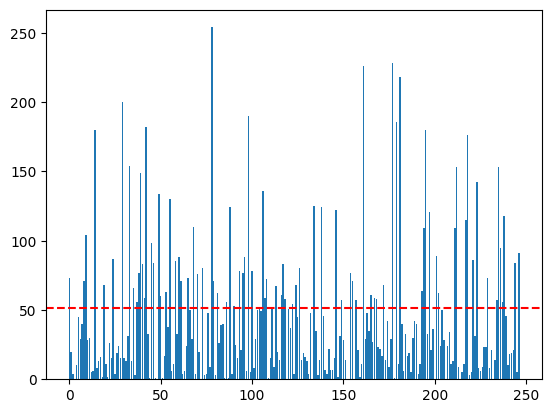

In [7]:
fig, ax = plt.subplots()

ax.bar(example_data["index"], example_data["total_runs"])
ax.axhline(average, color="red", linestyle="--")

plt.show()

In [8]:
example_data = example_data.with_columns(
    pl.when(pl.col("how_out").is_in(valid_out)).then(1).otherwise(0).alias("out_flag")
)
example_data.head()

index,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,start_date,venue,out_flag
u32,i64,i64,i64,i64,bool,str,i64,i64,str,str,i32
0,565809,1,73,229,true,"""caught and bow…",4,0,"""2012-12-13T00:…","""Vidarbha Crick…",1
1,565809,3,20,56,false,null,1,1,"""2012-12-13T00:…","""Vidarbha Crick…",0
2,569243,1,4,11,true,"""caught""",1,0,"""2013-03-06T00:…","""University Ova…",1
3,569243,3,0,2,false,null,0,0,"""2013-03-06T00:…","""University Ova…",0
4,569244,1,10,20,true,"""caught""",1,0,"""2013-03-14T00:…","""Basin Reserve""",1


In [9]:
example_data = example_data.with_columns(
    (pl.col("total_runs") / pl.col("out_flag")).alias("average")
)
example_data.head()

index,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,start_date,venue,out_flag,average
u32,i64,i64,i64,i64,bool,str,i64,i64,str,str,i32,f64
0,565809,1,73,229,true,"""caught and bow…",4,0,"""2012-12-13T00:…","""Vidarbha Crick…",1,73.0
1,565809,3,20,56,false,null,1,1,"""2012-12-13T00:…","""Vidarbha Crick…",0,inf
2,569243,1,4,11,true,"""caught""",1,0,"""2013-03-06T00:…","""University Ova…",1,4.0
3,569243,3,0,2,false,null,0,0,"""2013-03-06T00:…","""University Ova…",0,NaN
4,569244,1,10,20,true,"""caught""",1,0,"""2013-03-14T00:…","""Basin Reserve""",1,10.0


In [10]:
example_data = example_data.with_columns(
    rolling_runs=pl.col("total_runs").rolling_sum(10)
)
example_data = example_data.with_columns(
    rolling_wickets=pl.col("out_flag").rolling_sum(10)
)
example_data = example_data.with_columns(
    (pl.col("rolling_runs") / pl.col("rolling_wickets")).alias("rolling_average")
)

In [11]:
example_data.head()

index,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,start_date,venue,out_flag,average,rolling_runs,rolling_wickets,rolling_average
u32,i64,i64,i64,i64,bool,str,i64,i64,str,str,i32,f64,i64,i32,f64
0,565809,1,73,229,true,"""caught and bow…",4,0,"""2012-12-13T00:…","""Vidarbha Crick…",1,73.0,null,null,null
1,565809,3,20,56,false,null,1,1,"""2012-12-13T00:…","""Vidarbha Crick…",0,inf,null,null,null
2,569243,1,4,11,true,"""caught""",1,0,"""2013-03-06T00:…","""University Ova…",1,4.0,null,null,null
3,569243,3,0,2,false,null,0,0,"""2013-03-06T00:…","""University Ova…",0,NaN,null,null,null
4,569244,1,10,20,true,"""caught""",1,0,"""2013-03-14T00:…","""Basin Reserve""",1,10.0,null,null,null


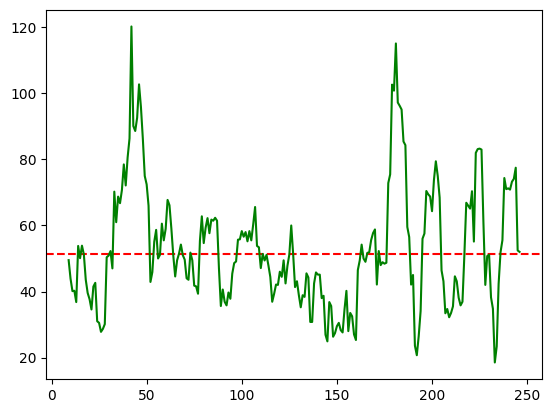

In [12]:
fig, ax = plt.subplots()

# ax.bar(example_data["index"], example_data["total_runs"])
ax.axhline(average, color="red", linestyle="--")
ax.plot(example_data["index"], example_data["rolling_average"], color="green")

plt.show()

In [13]:
def monte_carlo_resample(data, n_samples=1000):
    resampled_data = np.zeros(n_samples)
    for i in range(n_samples):
        resampled_data[i] = np.sum(np.random.choice(data, len(data)))
    percentile_5 = np.percentile(resampled_data, 5)
    percentile_95 = np.percentile(resampled_data, 95)

    return percentile_5, percentile_95

In [14]:
def add_confidence_intervals(dataframe, column_name, window=10, n_samples=1000):
    dataframe = dataframe.with_columns(
        [pl.lit(0).alias("lower_bound"), pl.lit(0).alias("upper_bound")]
    )
    for index in range(len(dataframe)):
        if index < window:
            continue
        lower_bound, upper_bound = monte_carlo_resample(
            dataframe[column_name][index - window : index], n_samples
        )
        dataframe[index, "lower_bound"] = lower_bound
        dataframe[index, "upper_bound"] = upper_bound

    return dataframe

In [16]:
example_data.head()

index,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,start_date,venue,out_flag,average,rolling_runs,rolling_wickets,rolling_average
u32,i64,i64,i64,i64,bool,str,i64,i64,str,str,i32,f64,i64,i32,f64
0,565809,1,73,229,true,"""caught and bow…",4,0,"""2012-12-13T00:…","""Vidarbha Crick…",1,73.0,null,null,null
1,565809,3,20,56,false,null,1,1,"""2012-12-13T00:…","""Vidarbha Crick…",0,inf,null,null,null
2,569243,1,4,11,true,"""caught""",1,0,"""2013-03-06T00:…","""University Ova…",1,4.0,null,null,null
3,569243,3,0,2,false,null,0,0,"""2013-03-06T00:…","""University Ova…",0,NaN,null,null,null
4,569244,1,10,20,true,"""caught""",1,0,"""2013-03-14T00:…","""Basin Reserve""",1,10.0,null,null,null


In [17]:
example_data = add_confidence_intervals(
    example_data, "rolling_runs", window=10, n_samples=1000
)

In [18]:
example_data.head()

index,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,start_date,venue,out_flag,average,rolling_runs,rolling_wickets,rolling_average,lower_bound,upper_bound
u32,i64,i64,i64,i64,bool,str,i64,i64,str,str,i32,f64,i64,i32,f64,i32,i32
0,565809,1,73,229,true,"""caught and bow…",4,0,"""2012-12-13T00:…","""Vidarbha Crick…",1,73.0,null,null,null,0,0
1,565809,3,20,56,false,null,1,1,"""2012-12-13T00:…","""Vidarbha Crick…",0,inf,null,null,null,0,0
2,569243,1,4,11,true,"""caught""",1,0,"""2013-03-06T00:…","""University Ova…",1,4.0,null,null,null,0,0
3,569243,3,0,2,false,null,0,0,"""2013-03-06T00:…","""University Ova…",0,NaN,null,null,null,0,0
4,569244,1,10,20,true,"""caught""",1,0,"""2013-03-14T00:…","""Basin Reserve""",1,10.0,null,null,null,0,0


In [19]:
example_data = example_data.with_columns(
    (pl.col("lower_bound") / pl.col("rolling_wickets")).alias("lower_bound_average")
)
example_data = example_data.with_columns(
    (pl.col("upper_bound") / pl.col("rolling_wickets")).alias("upper_bound_average")
)
example_data = example_data.with_columns(
    pl.col("start_date")
    .str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
    .cast(pl.Datetime)
)

example_data.tail()

/var/folders/cx/s5ndpxx93v7189yff9pnn0xr0000gn/T/ipykernel_7630/1002131880.py:3: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  example_data = example_data.with_columns(pl.col("start_date").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f").cast(pl.Datetime))


index,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,start_date,venue,out_flag,average,rolling_runs,rolling_wickets,rolling_average,lower_bound,upper_bound,lower_bound_average,upper_bound_average
u32,i64,i64,i64,i64,bool,str,i64,i64,datetime[μs],str,i32,f64,i64,i32,f64,i32,i32,f64,f64
242,1336045,2,19,45,true,"""caught""",2,0,2023-07-06 00:00:00,"""Headingley, Le…",1,19.0,586,8,73.25,3566,5061,445.75,632.625
243,1336045,4,21,33,true,"""caught""",3,0,2023-07-06 00:00:00,"""Headingley, Le…",1,21.0,593,8,74.125,3925,5376,490.625,672.0
244,1336046,2,84,95,true,"""bowled""",9,1,2023-07-19 00:00:00,"""Old Trafford, …",1,84.0,620,8,77.5,4406,5573,550.75,696.625
245,1336047,1,5,11,true,"""bowled""",1,0,2023-07-27 00:00:00,"""Kennington Ova…",1,5.0,472,9,52.444444,5087,5781,565.222222,642.333333
246,1336047,3,91,106,true,"""bowled""",11,1,2023-07-27 00:00:00,"""Kennington Ova…",1,91.0,468,9,52.0,5252,5789,583.555556,643.222222


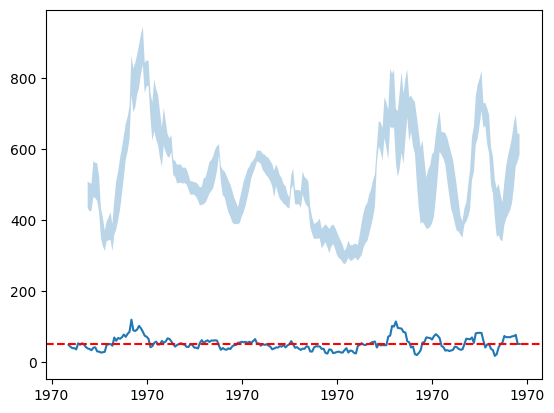

In [20]:
fig, ax = plt.subplots()

ax.plot(example_data["index"], example_data["rolling_average"])
ax.fill_between(
    example_data["index"],
    example_data["lower_bound_average"],
    example_data["upper_bound_average"],
    alpha=0.3,
)
ax.axhline(average, color="red", linestyle="--")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# ax.xaxis.set_major_locator(mdates.YearLocator())

plt.show()

# ODI scores by batting order

Made some more data to check the ODI scores by batting order - this is just a quick check to see if the data is in the right format. The features should be useful for the model I intend to build.

In [29]:
odi_data = pl.read_parquet(DATA_FOLDER.joinpath("odi_batter_data_2.parquet"))
odi_data.head()

batter_id,match_id,innings_number,total_runs,balls_faced,out,how_out,fours,sixes,earliest_batter_delivery,earliest_non_striker_delivery,earliest_delivery,batting_number
str,str,i64,i64,u32,bool,str,u32,u32,f64,f64,f64,u32
"""45eda7c8""","""1000887""",1,16,12,true,"""caught""",1,1,4.5,5.1,4.5,4
"""193ef196""","""1000887""",2,18,22,true,"""caught""",1,1,0.5,0.1,0.1,2
"""9cb8d7a6""","""1000887""",2,29,36,true,"""caught""",1,1,25.6,26.1,25.6,7
"""b681e71e""","""1000889""",1,23,26,true,"""bowled""",2,1,17.3,18.1,17.3,6
"""193ef196""","""1000891""",1,50,47,true,"""bowled""",8,1,0.6,0.1,0.1,2


In [27]:
odi_batter_arrival = pl.read_parquet(DATA_FOLDER.joinpath("odi_batter_arrival.parquet"))
odi_batter_arrival.head()

match_id,batter_id,innings_number,earliest_batter_delivery,earliest_non_striker_delivery,earliest_delivery,batting_number
str,str,i64,f64,f64,f64,u32
"""1000887""","""dcce6f09""",1,0.1,1.1,0.1,1
"""1000887""","""12b610c2""",1,1.1,0.1,0.1,2
"""1000887""","""30a45b23""",1,4.4,null,4.4,3
"""1000887""","""45eda7c8""",1,4.5,5.1,4.5,4
"""1000887""","""3d8feaf8""",1,10.2,9.3,9.3,5


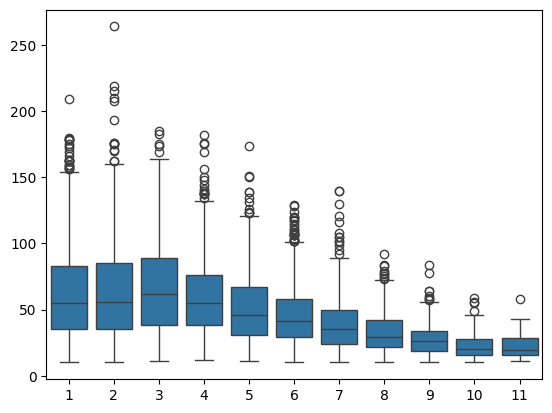

In [34]:
fig, ax = plt.subplots()

sns.boxplot(odi_data, x="batting_number", y="total_runs", ax=ax)
ax.set(xlabel=None, ylabel=None)
plt.show()